<a href="https://www.kaggle.com/code/muhammadumairab/transformers-based-nlp-model?scriptVersionId=136650378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_names = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_names.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
#Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
#Set the seed value
SEED = 4243

In [4]:
#Read the sample file
sample = pd.read_csv(file_names[0])
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [5]:
#Read the training data
train = pd.read_csv(file_names[1])
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#Read the test data
test = pd.read_csv(file_names[2])
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## EDA

In [7]:
#Define the label
TARGET = "target"

In [8]:
#Define a function to plot he Null values in a given DataFrame
def plot_null_values(df):
    print("Total number os samples in the data =",df.shape[0])
    sns.heatmap(df.isnull().sum().to_frame(),
                annot=True,
                fmt="d",
                cmap="crest"
                )

				NULL values in Train Dataset
Total number os samples in the data = 7613


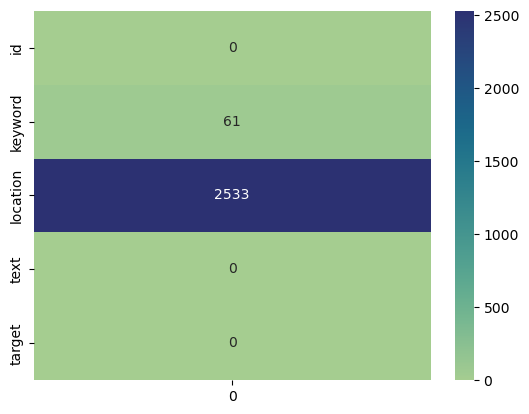

In [9]:
#Use the plot_null_values function to plot Null values in the train dataset
print("\t\t\t\tNULL values in Train Dataset")
plot_null_values(train)

				NULL values in Test Dataset
Total number os samples in the data = 3263


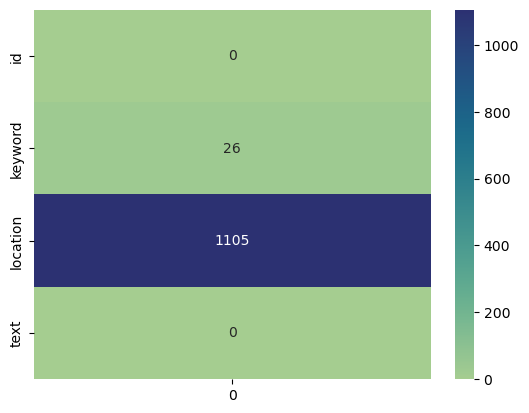

In [10]:
#Use the plot_null_values function to plot Null values in the test dataset
print("\t\t\t\tNULL values in Test Dataset")
plot_null_values(test)

In [11]:
#Replace the Null values with str(0)
train.fillna("0",inplace=True)
test.fillna("0",inplace=True)

				NULL values in Train Dataset
Total number os samples in the data = 7613


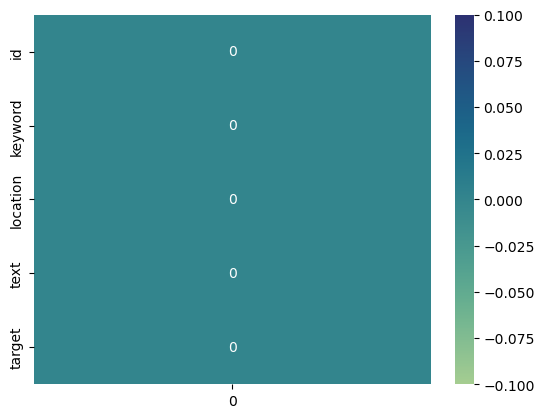

In [12]:
#Check the updated train dataset
print("\t\t\t\tNULL values in Train Dataset")
plot_null_values(train)

				NULL values in Test Dataset
Total number os samples in the data = 3263


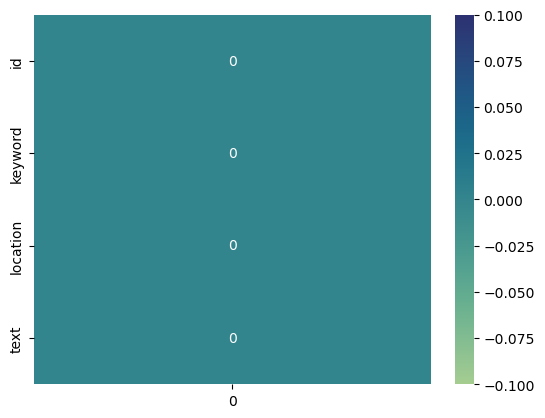

In [13]:
#Check the updated test dataset
print("\t\t\t\tNULL values in Test Dataset")
plot_null_values(test)

In [14]:
#Check for duplicate values
train[train.duplicated()]

,id,keyword,location,text,target


**It is evident that there are no repeated tweets in our dataset.**

## Target Analysis

To assess the balance of our data, let's examine the distribution of values in the "target" column.

<Axes: xlabel='target', ylabel='Count'>

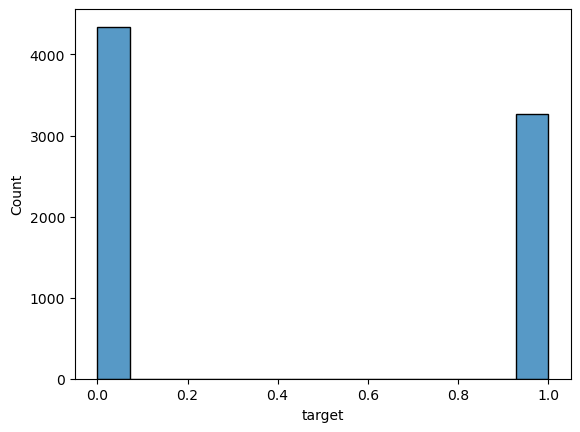

In [15]:
#Target analysis
sns.histplot(x=train[TARGET])

In [16]:
#Define a function to get the maximum length of words in each column
def check_max_length_sentence(df):
    max_length = 0
    for text in df["text"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Text column is:",max_length)
    
    max_length = 0
    for text in df["location"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Location column is:",max_length)
    
    max_length = 0
    for text in df["keyword"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Keyword column is:",max_length)

In [17]:
#Maximum lengths of columns in train data
check_max_length_sentence(train)

Maximum length of Text column is: 157
Maximum length of Location column is: 49
Maximum length of Keyword column is: 21


In [18]:
#Maximum lengths of columns in test data
check_max_length_sentence(test)

Maximum length of Text column is: 151
Maximum length of Location column is: 42
Maximum length of Keyword column is: 21


**Relying solely on the length of tweets doesn't provide a comprehensive understanding. To gain a better perspective on the maximum length required for vectorization, let's examine the distribution of tweet lengths.**

In [19]:
def get_sentence_lengths(df):
    df2 = pd.DataFrame(columns=["length"])
    i = 0
    for text in df["text"]:
        df2.loc[i,"length"] = len(text)
        i+=1
    return df2

def plot_sentence_lengths(df):
    lengths_df = get_sentence_lengths(df)
    bins = range(0,161,20)
    plt.hist(lengths_df["length"], bins=bins,alpha=0.3)
    #sns.countplot(data=lengths_df, x="length")
    plt.title("Distribution of sentence lengths")

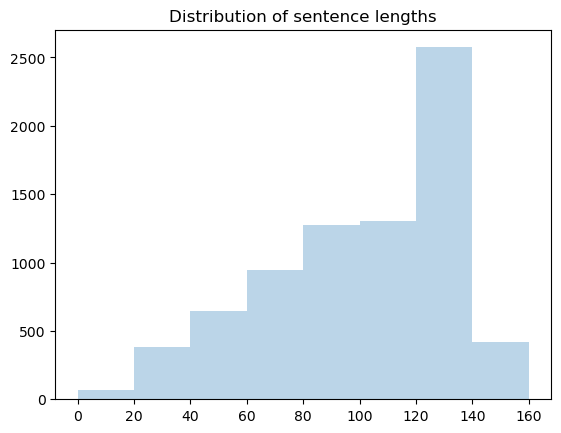

In [20]:
#Use the plot_sentence_lengths function on train dataset
plot_sentence_lengths(train)

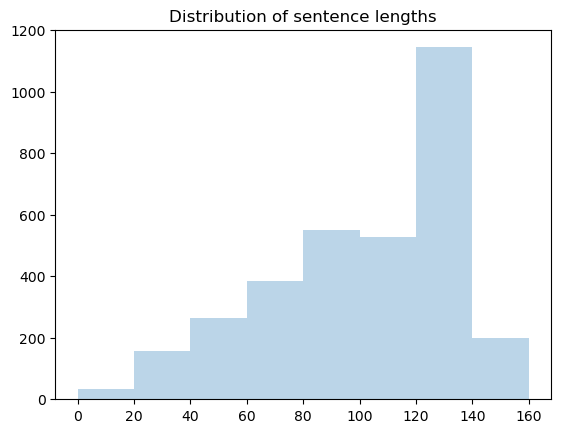

In [21]:
#Use the plot_sentence_lengths function on test dataset
plot_sentence_lengths(test)

## Data processing

In [22]:
#Shuffle the DataFrame
train = shuffle(train, random_state=SEED)
train = shuffle(train, random_state=int(SEED/2))
train.head()

,id,keyword,location,text,target
2342,3369,demolition,0,#download &amp; #watch Demolition Frog (2002) ...,1
6001,8572,screams,0,@heyot6 Im not home. I need to watch. [Screams],0
6876,9859,traumatised,Ireland,Back in Ireland v. sad/traumatised as is freez...,0
7397,10584,windstorm,0,Texas Seeks Comment on Rules for Changes to Wi...,0
1683,2428,collide,The Forever Girl,The Witches of the Glass Castle. Supernatural ...,0


In [23]:
#Convert train data to tf.data.Dataset object
BATCH = 32
#Concatenate the text data of the columns "keyword", "location", "text"
train_tf = tf.data.Dataset.from_tensor_slices(
    (train['keyword'] + train['location'] + train['text'], train[TARGET]))

#Convert the data into batch
train_tf = train_tf.shuffle(SEED).batch(BATCH)

#Convert test data to tf.data.Dataset object
test_tf = tf.data.Dataset.from_tensor_slices(
    test['keyword'] + test['location'] + test['text'])

#Convert the data into batch
test_tf = test_tf.batch(BATCH)

## Text Vectorization

To enable the model to process the text data, we need to convert it into integer values through a process called text vectorization.

In [24]:
max_length = 165
max_tokens = 10_000

#Instantiate the TextVectorization layer
text_vectorization = layers.TextVectorization(max_tokens=max_tokens,
                                              output_mode='int',
                                              output_sequence_length=max_length
                                             )

In [25]:
#Learn the vocabulary
text_vectorization.adapt(train_tf.map(lambda twt, target: twt))

In [26]:
#Get the vocabulary
vocab = text_vectorization.get_vocabulary()
print("Vocabulary size =",len(vocab))

#Convert the list object to NumPy array for decoding the vectorized data
vocab = np.array(vocab)

Vocabulary size = 10000


In [27]:
#Vectorize the train dataset
train_tf = train_tf.map(lambda twt, target: (text_vectorization(twt), target),
                   num_parallel_calls=tf.data.AUTOTUNE)

#Vectorize the test dataset
test_tf = test_tf.map(lambda twt: text_vectorization(twt),
                      num_parallel_calls=tf.data.AUTOTUNE)

In [28]:
#Define a function to print the tokenized data
def print_sample(data_obj):
    for sample, traget in data_obj:
        #Print the first item
        print("1st sample:",sample[0].numpy())
        print("\n")
        #Print the second item
        print("2nd sample:",sample[1].numpy())
        print("\n")
        #Print the third item
        print("3rd sample:",sample[2].numpy())
        print("\n")
        break

In [29]:
#Print the tokenized data
print_sample(train_tf)

1st sample: [   1 7200 6599 5236    1   91   65  603   28   27 1539 3807   50  435
  581    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


2nd sample: [   1 1402 4059   32 2483    1   18  167    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0

In [30]:
#Print the vectorized tweet and the decoded tweet
for tx in train_tf:
    print("\t\t\t\tVectorized Tweet:\n",tx[0][0])
    print("\n\n\t\t\t\tDecoded Tweet:\n", " ".join(vocab[tx[0][0].numpy()]))
    break

				Vectorized Tweet:
 tf.Tensor(
[   1    1    1  826    5   97   13 9985    7 1329  791    1    1    1
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(165,), dtype=int64)


				Decoded Tweet:
 [UNK] [UNK] [UNK] happy to see my teammates and training hard [UNK] [UNK] [UNK

## Model

To classify the tweets, we will employ a Transformer model specifically designed as an Encoder-only model. In this approach, we will define the Encoder layer and incorporate a Positional Embedding layer using Keras subclassing. By utilizing these components, we aim to enhance the accuracy and effectiveness of our classification model.

Moreover, the Transformer model's architecture enables it to capture contextual relationships and dependencies among words or tokens within the tweets. The Encoder layer acts as a powerful feature extractor, learning representations that contribute to the tweet classification task.

Additionally, the Positional Embedding layer adds crucial positional information to the input tokens, enabling the model to discern the sequential order of words in the tweet. This positional encoding facilitates the Transformer model in capturing long-range dependencies and effectively processing the input text.

By combining the Transformer's robust architecture with Keras subclassing, we can create a powerful and flexible model that yields accurate tweet classification results.

In [31]:
#Define a Transformer Encoder using subclassed layer
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        #Size of the input vector (size of the vocabulary)
        self.embed_dim = embed_dim
        #Size of the inner dense layer
        self.dense_dim = dense_dim
        #Number of attention heads
        self.num_heads = num_heads

        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
                   [layers.Dense(dense_dim, activation="relu"),
                    layers.Dense(embed_dim),]
                                        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.max_pool1 = layers.GlobalMaxPooling1D()

    #Define a call() method  where forward pass is implemented
    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        #Apply the attention layer
        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        #Normalize the data
        proj_input = self.layernorm_1(inputs + attention_output)
        #Apply the dense layer
        proj_output = self.dense_proj(proj_input)
        #Normalize the data and return it
        return self.layernorm_2(proj_input + proj_output)
        
        #return self.max_pool1(norm)

    #Define configuration method
    def get_config(self):
        config = super().get_config()
        config.update({
                    "embed_dim": self.embed_dim,
                    "num_heads": self.num_heads,
                    "dense_dim": self.dense_dim,
                    })
        return config

In [32]:
# Implementing positional embedding as a subclassed layer
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.token_embeddings = layers.Embedding(
          input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
                   input_dim=sequence_length, output_dim=output_dim)

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
            return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
           "output_dim": self.output_dim,
           "sequence_length": self.sequence_length,
           "input_dim": self.input_dim,
                    })
        return config

In [33]:
#Construct the model

#Define the input
inputs = keras.Input(shape=(None,), dtype="int64")

#Apply positional embeddings
pos_embed = PositionalEmbedding(sequence_length=165,
                        input_dim=10_000,
                        output_dim=256)(inputs)

#Apply the encoder
encoded = TransformerEncoder(embed_dim=256,
                             dense_dim=32,
                             num_heads=8)(pos_embed)


x = layers.GlobalMaxPooling1D()(encoded)
x = layers.Dropout(0.5)(x)
output = layers.Dense(units=1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs,outputs=output)

In [34]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.98,epsilon=1e-9),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

In [35]:
#Summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding (Posit  (None, None, 256)        2602240   
 ionalEmbedding)                                                 
                                                                 
 transformer_encoder (Transf  (None, None, 256)        2121248   
 ormerEncoder)                                                   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

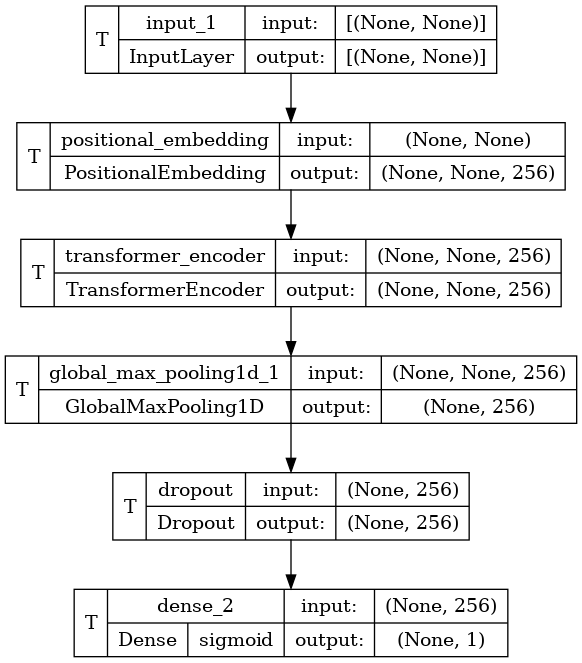

In [36]:
#Plot the model
keras.utils.plot_model(model=model,
                       to_file="model.png",
                       show_shapes=True,
                       show_layer_names=True,
                       expand_nested=True,
                       show_layer_activations=True,
                       show_trainable=True,
        )

In [37]:
#Define callbacks
callbacks = [
       keras.callbacks.ModelCheckpoint("tweets_classifier.keras",
                                       save_best_only=True)
            ]

In [38]:
#Define the validation data size
val_size = int(0.15 * len(train_tf))

In [39]:
# Split the data into training and validation
validation_dataset = train_tf.take(val_size)
train_dataset = train_tf.skip(val_size)

In [40]:
#Train the model
history = model.fit(train_dataset,
                    epochs=120,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/120
203/203 [==============================] - 32s 113ms/step - loss: 1.2121 - accuracy: 0.5087 - val_loss: 0.6933 - val_accuracy: 0.5616
Epoch 2/120
203/203 [==============================] - 12s 59ms/step - loss: 1.0765 - accuracy: 0.5304 - val_loss: 0.6727 - val_accuracy: 0.5946
Epoch 3/120
203/203 [==============================] - 10s 51ms/step - loss: 0.9596 - accuracy: 0.5477 - val_loss: 0.6413 - val_accuracy: 0.6161
Epoch 4/120
203/203 [==============================] - 10s 48ms/step - loss: 0.8570 - accuracy: 0.5620 - val_loss: 0.6374 - val_accuracy: 0.6268
Epoch 5/120
203/203 [==============================] - 9s 46ms/step - loss: 0.7843 - accuracy: 0.5717 - val_loss: 0.6053 - val_accuracy: 0.7063
Epoch 6/120
203/203 [==============================] - 9s 45ms/step - loss: 0.7272 - accuracy: 0.5908 - val_loss: 0.5926 - val_accuracy: 0.7080
Epoch 7/120
203/203 [==============================] - 10s 47ms/step - loss: 0.6973 - accuracy: 0.6057 - val_loss: 0.5799 - val_acc

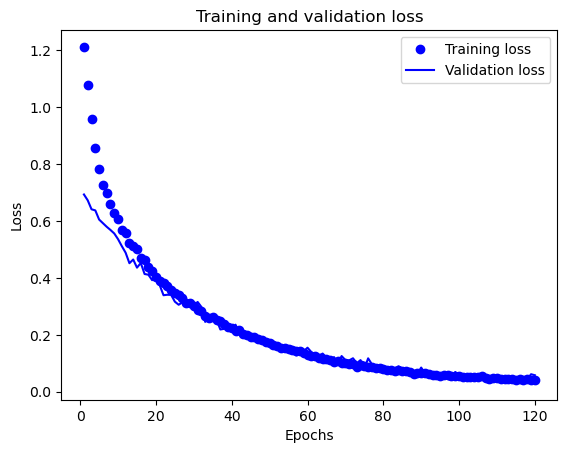

In [41]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

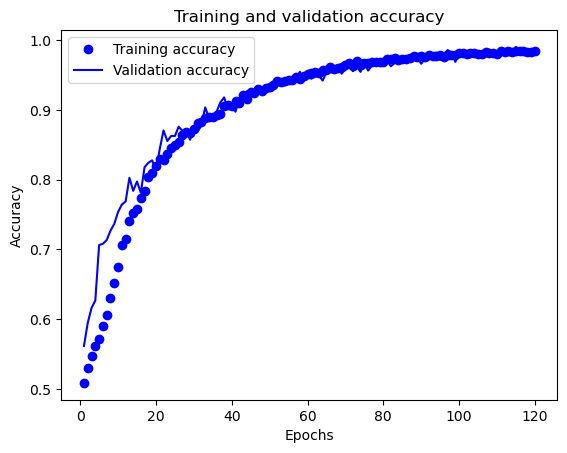

In [42]:
# Plotting the training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [43]:
#Classify the tweets of test data
predictions = model.predict(test_tf)

102/102 [==============================] - 2s 17ms/step


In [44]:
#Print the predictions
predictions

array([[0.9991134 ],
       [0.99994457],
       [0.9999933 ],
       ...,
       [0.9999788 ],
       [0.96640724],
       [0.99998736]], dtype=float32)

In [45]:
threshold = 0.5
#Convert the float values to binary
final_predictions = [1 if i > threshold else 0 for i in predictions]
final_predictions[:10]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]

In [46]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [47]:
submissions = pd.DataFrame(columns=["id","target"])
submissions["target"] = final_predictions
submissions["id"] = test.id
submissions

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [48]:
#Save the file as a csv file
submissions.to_csv("submission.csv", index=False)